# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|	범주	|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|	범주	|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|	범주	|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 연 수입액은 고객 이탈에 큰 영향을 미칠 것이다.

* 가설2 : 평균 통화시간은 고객 이탈에 영향을 미치지 않을 것이다.

* 가설3 : 핸드폰 가격은 고객 이탈에 큰 영향을 미칠 것이다.

* 가설4 : 만족도 설문은 고객 이탈에 큰 영향을 미칠 것이다.

* 가설5 : 대학 졸업 여부는 고객 이탈에 영향을 미치지 않을 것이다.

* 가설6 : 집 가격은 고객 이탈에 영향을 미치지 않을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) COLLEGE	

① 변수의 비즈니스 의미   : 대학 졸업 여부

② 숫자? 범주? : 범주

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [4]:
mobile['COLLEGE'].isna().sum()

0

* NaN 없음
* 1,0 값이라 필요없음

④ 기초통계량


In [5]:
mobile['COLLEGE'].value_counts()

1    9049
0    8951
Name: COLLEGE, dtype: int64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


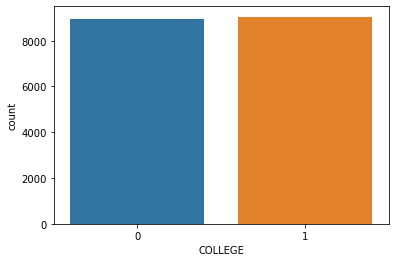

In [6]:
sns.countplot(mobile['COLLEGE'], order = [0, 1])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 대학 졸업여부가 비슷하게 분포하여 있음.

⑦ 추가 분석해볼 사항 도출

* 대학 졸업에 따른 고객 이탈 여부

### 2) INCOME	

① 변수의 비즈니스 의미   : 연 수입액

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [7]:
mobile['INCOME'].isna().sum()

0

* NaN 없음
* 숫자라 필요없음

④ 기초통계량


In [9]:
mobile['INCOME'].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


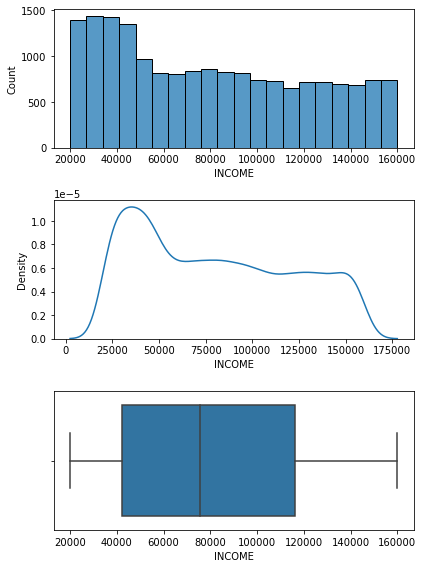

In [10]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['INCOME'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['INCOME'])

plt.subplot(3,1,3)
sns.boxplot(mobile['INCOME'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 20,000 ~ 60,000 까지에 많이 몰려있음

⑦ 추가 분석해볼 사항 도출

* 집 가격 및 핸드폰 가격 등과 비교해볼 필요가 있음

### 3) OVERAGE

① 변수의 비즈니스 의미   : 월 초과사용 시간(분)

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [11]:
mobile['OVERAGE'].isna().sum()

0

* NaN 없음
* 숫자라 필요없음

④ 기초통계량

In [12]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포  

In [12]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


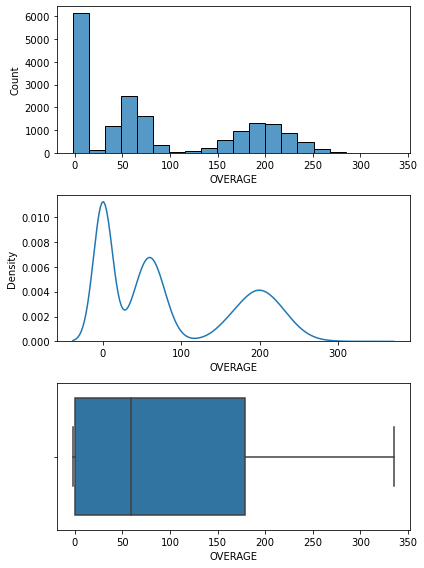

In [13]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['OVERAGE'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['OVERAGE'])

plt.subplot(3,1,3)
sns.boxplot(mobile['OVERAGE'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 초과시간이 0분인 사람이 대다수이며 평균적으로 86분정도 초과함
* 0분에서 30분까지 30분에서 150분까지, 150분 에서 300까지 범주로 나뉘어 조사가 필요

⑦ 추가 분석해볼 사항 도출

* 잔여시간과의 비교 및 이탈여부를 확인하고 3개의 범위를 나누어 분석할 필요가 있음

### 4) LEFTOVER

① 변수의 비즈니스 의미   : 월 사용 잔여시간(%)

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [14]:
mobile['LEFTOVER'].isna().sum()

0

* NaN 없음
* 숫자라 필요없음

④ 기초통계량


In [17]:
mobile['LEFTOVER'].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


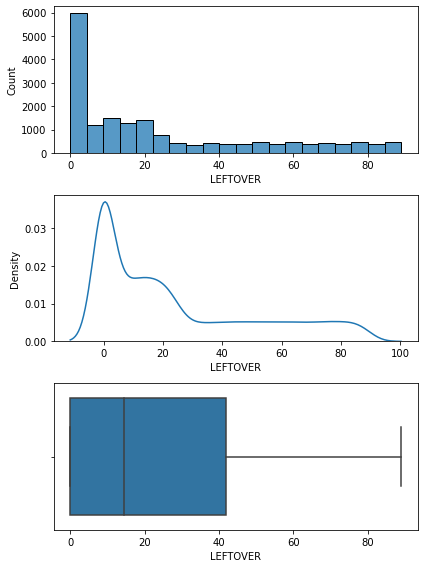

In [52]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['LEFTOVER'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['LEFTOVER'])

plt.subplot(3,1,3)
sns.boxplot(mobile['LEFTOVER'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 잔여 시간이 대부분 없으며 평균 23% 정도 남는다고 보여짐

⑦ 추가 분석해볼 사항 도출

* 잔여시간과 이탈여부를 확인해야함

### 5) HOUSE

① 변수의 비즈니스 의미   : 집 가격(달러)

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [18]:
mobile['HOUSE'].isna().sum()

215

* NaN이 있으므로 notnull() 을 이용하여 데이터 분석을 할 예정
* 숫자라 필요없음

④ 기초통계량

In [19]:
mobile['HOUSE'].describe()

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


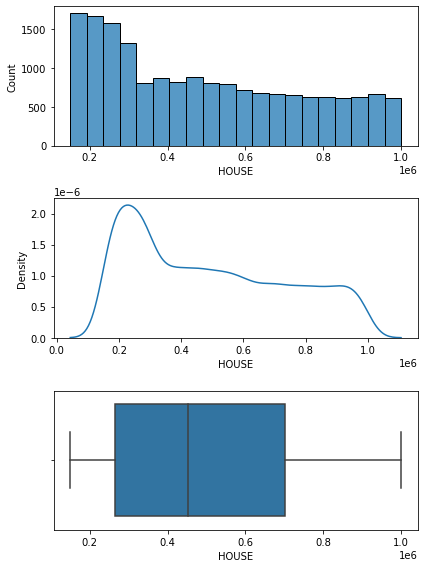

In [20]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['HOUSE'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['HOUSE'])

plt.subplot(3,1,3)
sns.boxplot(mobile['HOUSE'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 집이 없는 사용자도 있으며, 10만부터 30만달러 정도까지의 사용자가 많이 분포되어 있음

⑦ 추가 분석해볼 사항 도출

* 집값과 이탈 유무를 확인 해봐야함

### 6) HANDSET_PRICE

① 변수의 비즈니스 의미   : 핸드폰 가격(달러)

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [21]:
mobile['HANDSET_PRICE'].isna().sum()

0

* NaN 없음
* 숫자라 필요없음

④ 기초통계량


In [54]:
mobile['HANDSET_PRICE'].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


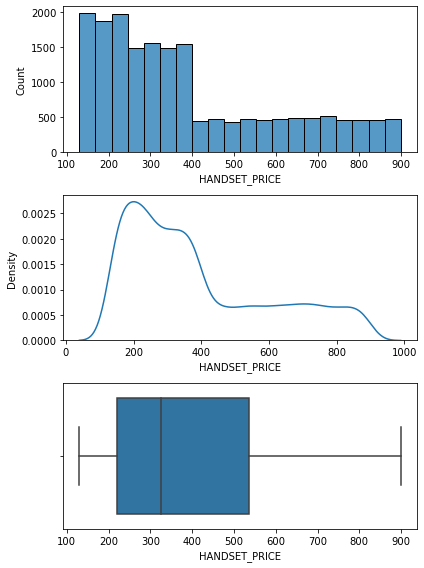

In [53]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['HANDSET_PRICE'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['HANDSET_PRICE'])

plt.subplot(3,1,3)
sns.boxplot(mobile['HANDSET_PRICE'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 평균적으로 390달러인 것을 알수있고 130달러부터 400달러까지의 분포가 가장 많다

⑦ 추가 분석해볼 사항 도출

* 2가지 범위로 나누어서 분석해볼 필요가 있음

### 7) CHURN(target)

① 변수의 비즈니스 의미   : 이탈 여부( 1: 이탈, 0: 잔류)

② 숫자? 범주? : 범주

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [22]:
mobile['CHURN'].isna().sum()

0

* NaN 없음
* 범주가 0,1 이라 필요 없음.

④ 기초통계량

In [55]:
mobile['CHURN'].value_counts()

0    9131
1    8869
Name: CHURN, dtype: int64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


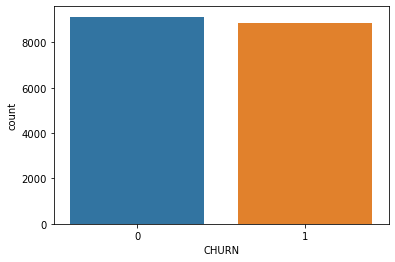

In [23]:
sns.countplot(mobile['CHURN'], order = [0, 1])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 이탈하는 비율이 근소하게 앞섬

⑦ 추가 분석해볼 사항 도출

* 다른 변수들과 비교 해봐야함

### 8) AVERAGE_CALL_DURATION

① 변수의 비즈니스 의미   : 평균 통화시간(분)

② 숫자? 범주? : 숫자

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [24]:
mobile['AVERAGE_CALL_DURATION'].isna().sum()

0

* NaN 없음
* 숫자라 필요없음

④ 기초통계량


In [56]:
mobile['AVERAGE_CALL_DURATION'].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


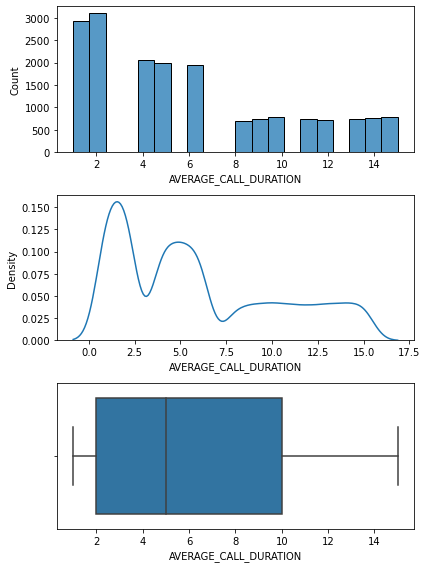

In [57]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['AVERAGE_CALL_DURATION'], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(mobile['AVERAGE_CALL_DURATION'])

plt.subplot(3,1,3)
sns.boxplot(mobile['AVERAGE_CALL_DURATION'])

plt.tight_layout()
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 평균적으로 6분정도 통화하며 6분 이전의 비율이 이후의 비율보다 많다.

⑦ 추가 분석해볼 사항 도출

* 남은 통화시간 및 초과 통화시간과의 분석 필요

### 9) REPORTED_SATISFACTION

① 변수의 비즈니스 의미   : 만족도 설문

② 숫자? 범주? : 범주

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [25]:
mobile['REPORTED_SATISFACTION'].isna().sum()

38

* NaN 이 있으므로 notnull()을 통해 데이터를 분석할 예정
* 범주형이고 1, 0 이 아니므로 가변수화 필요

④ 기초통계량


In [58]:
mobile['REPORTED_SATISFACTION'].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


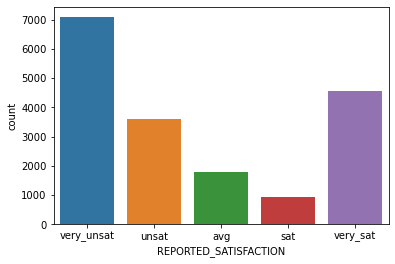

In [61]:
sns.countplot(mobile['REPORTED_SATISFACTION'], order = ['very_unsat' , 'unsat', 'avg' , 'sat' ,  'very_sat'])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 매우 불만족이 가장 많은 득점을 하였고 대체적으로 불만족이 많다.

⑦ 추가 분석해볼 사항 도출

* 불만족인 것과 만족인 것을 나누어 분석할 필요가 있음

### 10) CONSIDERING_CHANGE_OF_PLAN

① 변수의 비즈니스 의미   : 변경 계획 설문

② 숫자? 범주? : 범주

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  

In [62]:
mobile['CONSIDERING_CHANGE_OF_PLAN'].isna().sum()

0

* NaN 없음
* 범주형이고, 0,1 값이 아니므로 가변수화 필요

④ 기초통계량


In [64]:
mobile['CONSIDERING_CHANGE_OF_PLAN'].describe()

count           18000
unique              5
top       considering
freq             7141
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: object

In [66]:
mobile.head(10)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1
5,1,119591,0,43,231309.0,714,1,very_sat,considering,0
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1
7,1,63338,50,57,394791.0,362,1,sat,no,0
8,1,133496,163,11,166179.0,864,5,NaN,actively_looking_into_it,1
9,1,155145,29,18,717451.0,671,4,unsat,considering,0


⑤ 분포  

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


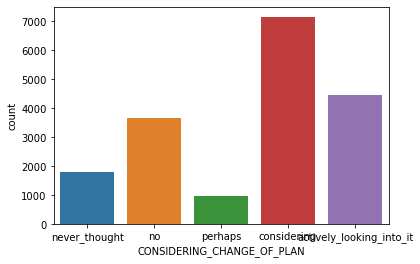

In [67]:
sns.countplot(mobile['CONSIDERING_CHANGE_OF_PLAN'], 
              order = ['never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it'])
plt.show()

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리 

* 고려해본다는 설문이 가장 많으며 절대 안바꾼다는 비율이 현저히 낮음

⑦ 추가 분석해볼 사항 도출

* considering, actively_looking_into_it의 비율이 가장 높으므로 이 안에서 그 이유를 분석해야 함

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [4]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

In [30]:
pd.crosstab(mobile[target], mobile['COLLEGE'])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


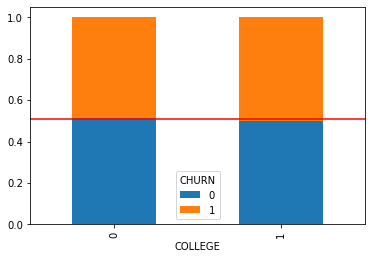

In [32]:
temp = pd.crosstab(mobile['COLLEGE'], mobile[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

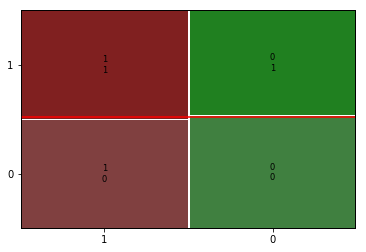

In [33]:
mosaic(mobile, [ 'COLLEGE',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [34]:
# 먼저 집계
table = pd.crosstab(mobile[target], mobile['COLLEGE'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]


### < 파악한 내용>

- 자유도가 1인 것에 2 ~ 3배인 2 ~ 3 보다는 카이제곱통계량이 높고 pvalue도 0.05 보다 낮은것으로 보아 관계는 있지만 그래프상으로 보면 약한 관계인 것으로 보임


#### 2) REPORTED_SATISFACTION --> CHURN

In [35]:
pd.crosstab(mobile[target], mobile['REPORTED_SATISFACTION'])

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3543
1,854,440,1798,2228,3529


CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


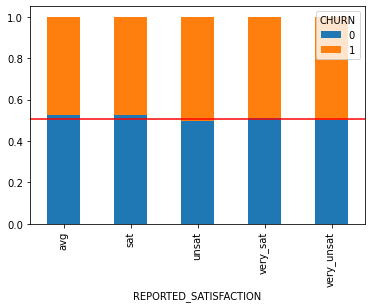

In [36]:
temp = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

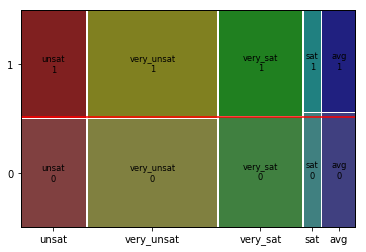

In [37]:
mosaic(mobile, [ 'REPORTED_SATISFACTION',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [38]:
# 먼저 집계
table = pd.crosstab(mobile[target], mobile['REPORTED_SATISFACTION'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
기대빈도
 [[ 916.27201871  472.84912593 1821.38236277 2314.5254426  3587.97104999]
 [ 889.72798129  459.15087407 1768.61763723 2247.4745574  3484.02895001]]


### < 파악한 내용>

- 자유도가 4인 것에 2~3배인 8 ~ 12 보다는 카이제곱통계량이 낮고 pvalue도 0.05 보다 높은것으로 보아 관계가 없는 것으로 보임
- 또한 그래프나 차트에서도 평균값에 다 근처하기 때문에 관계가 없음
- 하지만 설문 응답 결과를 범주로 나누어 분석 해볼 필요가 있어보임

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [39]:
pd.crosstab(mobile[target], mobile['CONSIDERING_CHANGE_OF_PLAN'])

CONSIDERING_CHANGE_OF_PLAN,actively_looking_into_it,considering,never_thought,no,perhaps
CHURN,,,,,
0,2278,3648,926,1823,456
1,2175,3493,878,1821,502


CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


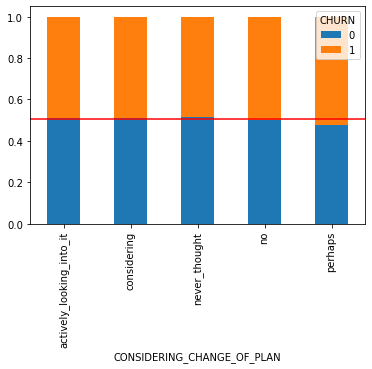

In [40]:
temp = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

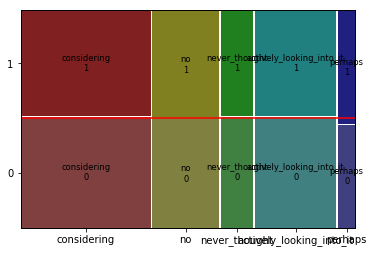

In [41]:
mosaic(mobile, [ 'CONSIDERING_CHANGE_OF_PLAN',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

In [42]:
# 먼저 집계
table = pd.crosstab(mobile[target], mobile['CONSIDERING_CHANGE_OF_PLAN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620689
p-value 0.2467222586679969
기대빈도
 [[2258.90794444 3622.47061111  915.12911111 1848.52022222  485.97211111]
 [2194.09205556 3518.52938889  888.87088889 1795.47977778  472.02788889]]


### < 파악한 내용>

- 자유도가 4인 것에 2~3배인 8 ~ 12 보다는 카이제곱통계량이 낮고 pvalue도 0.05 보다 높은것으로 보아 관계가 없는 것으로 보임

- 또한 그래프나 차트에서도 평균값에 다 근처하기 때문에 관계가 없음

- 하지만 모든 설문에 관계가 없는게 이상하기 때문에 범주를 나누어 분석해볼 필요가 있음

#### 4) feature --> CHURN

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


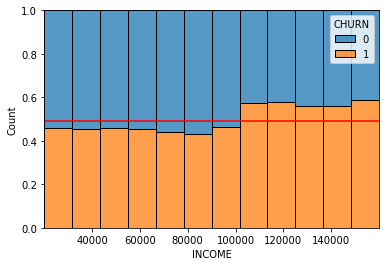

In [44]:
sns.histplot(x='INCOME', data = mobile, bins = 12
             , hue =target, multiple = 'fill')

plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

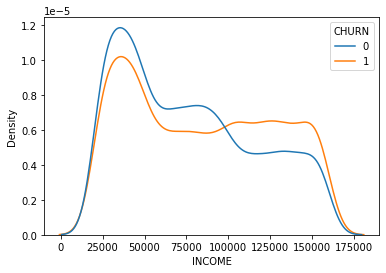

In [45]:
sns.kdeplot(x='INCOME', data = mobile, hue =target , common_norm = False)
plt.show()

In [47]:
temp = mobile.loc[mobile['INCOME'].notnull()]

model = sm.Logit(temp[target], temp['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


### < 파악한 내용>

- 수입이 100,000 전에는 이탈이 적었지만 100,000이후로 부터는 이탈이 더 많음
- 그래서 100,000 을 기준으로 범주를 나누어 분석 해볼 필요가 있음
- pvalue 값이 0.05 보단 작지만 많이 차이가 나지않고 그래프상으로 보면 관계는 있지만 약한 관계일 거라고 추정

#### 2) AVERAGE_CALL_DURATION --> CHURN


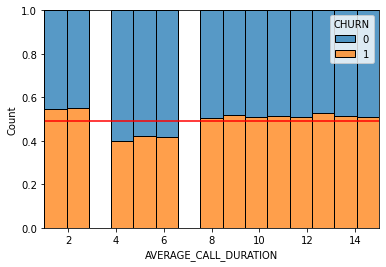

In [70]:
sns.histplot(x='AVERAGE_CALL_DURATION', data = mobile, bins = 15
             , hue =target, multiple = 'fill')

plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

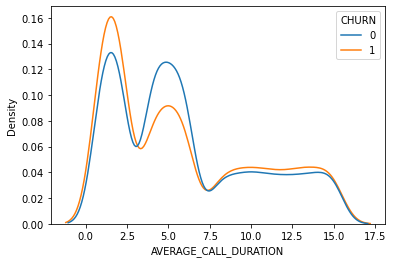

In [68]:
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue =target , common_norm = False)
plt.show()

In [69]:
temp = mobile.loc[mobile['AVERAGE_CALL_DURATION'].notnull()]

model = sm.Logit(temp[target], temp['AVERAGE_CALL_DURATION'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


### < 파악한 내용>

- 그래프 상으로 보면 크로스 되는 부분이 크게 3군데로 나뉘는데 이부분으로 범위를 나눌 필요가 있어보임
- 0분에서 2.5분에는 이탈이 더 많지만, 2.5분 부터 7.5분까지는 이탈이 더 적음
- pvalue 값이 0.05 보단 작지만 많이 차이가 나지않고 그래프상으로 보면 관계는 있지만 약한 관계일 거라고 추정

#### 3) HANDSET_PRICE --> CHURN


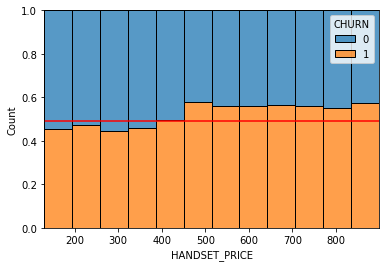

In [51]:
sns.histplot(x='HANDSET_PRICE', data = mobile, bins = 12
             , hue =target, multiple = 'fill')

plt.axhline(mobile[target].mean(), color = 'r')
plt.show()


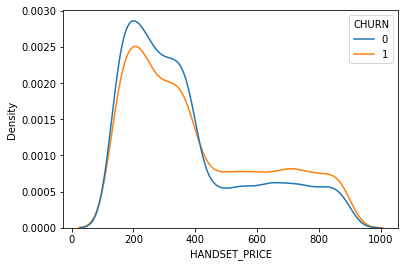

In [71]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue =target , common_norm = False)
plt.show()

In [72]:
temp = mobile.loc[mobile['HANDSET_PRICE'].notnull()]

model = sm.Logit(temp[target], temp['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


### < 파악한 내용>

- 그래프 상으로 400달러를 기준으로 이탈률이 차이가 남
- pvalue 값이 0.05 보단 작지만 많이 차이가 나지않고 그래프상으로 보면 관계는 있지만 약한 관계일 거라고 추정

#### 4) HOUSE --> CHURN


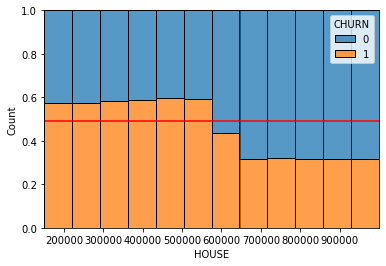

In [73]:
sns.histplot(x='HOUSE', data = mobile, bins = 12
             , hue =target, multiple = 'fill')

plt.axhline(mobile[target].mean(), color = 'r')
plt.show()


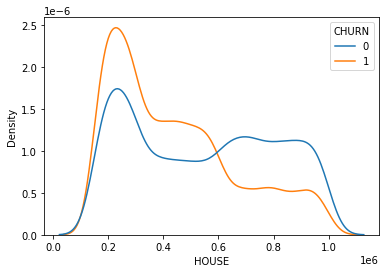

In [74]:
sns.kdeplot(x='HOUSE', data = mobile, hue =target , common_norm = False)
plt.show()

In [75]:
temp = mobile.loc[mobile['HOUSE'].notnull()]

model = sm.Logit(temp[target], temp['HOUSE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687266
         Iterations 2
HOUSE    6.401120e-47
dtype: float64


### < 파악한 내용>

- 그래프 상으로 보면 집값이 대략 600,000달러를 기준으로 이탈률이 정 반대가 됨
- 또한 각 부분마다 이탈률의 차이가 커서 관계가 강해보임
- pvalue 값이 0에 수렴할 정도로 작고, 그래프상으로도 보면 관계가 강해보임

#### 5) OVERAGE --> CHURN


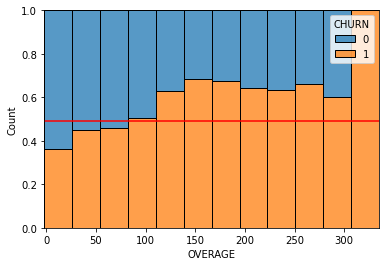

In [84]:
sns.histplot(x='OVERAGE', data = mobile, bins = 12
             , hue =target, multiple = 'fill')

plt.axhline(mobile[target].mean(), color = 'r')
plt.show()

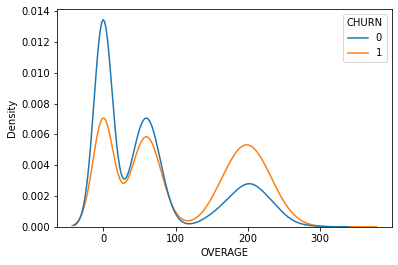

In [85]:
sns.kdeplot(x='OVERAGE', data = mobile, hue =target , common_norm = False)
plt.show()

In [88]:
temp = mobile.loc[mobile['OVERAGE'].notnull()]

model = sm.Logit(temp[target], temp['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


### < 파악한 내용>

- 그래프 상으로 보면 집값이 대략 100분을 기준으로 이탈률이 상반 되는 결과가 보임
- 또한 각 부분마다 이탈률의 차이가 커서 관계가 강해보임
- pvalue 값이 0에 수렴할 정도로 작고, 그래프상으로도 보면 관계가 강해보임

## 4.관계 정리

### 1) 강한관계의 변수

* HOUSE		
* OVERAGE

### 2) 약한관계의 변수

* COLLEGE 
* INCOME				
* AVERAGE_CALL_DURATION		
* HANDSET_PRICE			

### 3) 관계 없음

* REPORTED_SATISFACTION		
* CONSIDERING_CHANGE_OF_PLAN	

## 5.추가 분석

### 1) INCOME 범주로 나누어 분석

In [76]:
bins = [0, 100000, np.inf]
labels = ['LOW', 'HIGH' ]
mobile['Income_Group'] = pd.cut(mobile['INCOME'], bins = bins , labels = labels
                               , right = False)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,Income_Group
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,LOW
1,0,74132,191,43,535092.0,349,2,unsat,no,1,LOW
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,HIGH
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,HIGH
4,1,23392,0,0,216707.0,233,15,unsat,no,1,LOW


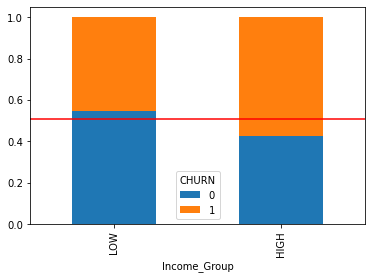

카이제곱통계량 243.5094787317262
p-value 6.753130507282287e-55


In [78]:
temp = pd.crosstab(mobile['Income_Group'], mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(mobile[target], mobile['Income_Group'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

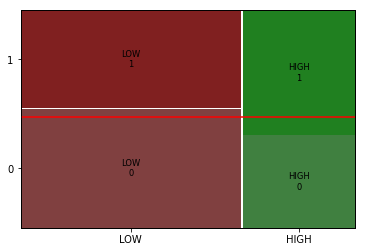

In [79]:
mosaic(mobile, [ 'Income_Group',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

### <파악한 내용>

* 숫자로 된것을 범주로 바꾸어 카이제곱 통계량을 살펴본 결과 자유도가 1인데 비해 243이라는 높은 수치를 나타내었고, pvalue도 0.05보다 현저히 작은 것을 보아 중간 관계라고 볼 수 있음

### 2) 변경 계획 설문 심층 분석

* never_thoght 라고 설문을 한 사람의 이탈률이 반반인지 데이터를 자세히 살표보았다

In [6]:
temp = mobile.loc[mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'never_thought']

temp.head(10)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
38,0,129806,0,15,345692.0,498,6,very_sat,never_thought,0
85,0,98987,226,24,523403.0,399,15,very_unsat,never_thought,1
88,1,64777,0,8,720317.0,289,6,very_sat,never_thought,0
105,1,157632,230,29,868015.0,839,6,unsat,never_thought,1
115,0,60641,33,0,987364.0,397,12,very_sat,never_thought,0
122,1,135177,38,0,214228.0,703,15,very_sat,never_thought,1
136,1,83731,69,19,526465.0,261,4,very_unsat,never_thought,0
161,1,69957,240,16,956392.0,345,5,very_sat,never_thought,0
164,0,36167,0,40,940806.0,174,2,very_unsat,never_thought,0


In [82]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

* 공통적으로 월 초과사용 시간이 평균값의 3배에 다다를 만큼 초과시간이 많음
* --> 이 뜻은 초과 사용시간이 많아 다른 통신사의 요금제를 사용할 가능성이 높음!!

In [5]:
temp = mobile.loc[mobile['CONSIDERING_CHANGE_OF_PLAN'] == 'actively_looking_into_it']

temp.head(10)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
6,1,99548,235,0,238561.0,294,6,very_unsat,actively_looking_into_it,1
8,1,133496,163,11,166179.0,864,5,NaN,actively_looking_into_it,1
14,1,39476,0,46,975301.0,132,2,very_sat,actively_looking_into_it,0
15,0,85246,0,12,864913.0,207,5,very_unsat,actively_looking_into_it,0
17,1,92778,0,0,564412.0,286,9,very_unsat,actively_looking_into_it,0
28,0,69417,52,88,686029.0,331,2,very_unsat,actively_looking_into_it,1
31,0,57157,41,74,248089.0,656,2,very_unsat,actively_looking_into_it,0
42,0,89152,230,0,605293.0,282,13,very_unsat,actively_looking_into_it,1
51,1,108123,0,0,987559.0,472,10,unsat,actively_looking_into_it,0
53,1,125375,216,37,793744.0,866,6,very_unsat,actively_looking_into_it,1


* 이번엔 반대로 적극적으로 바꾸고 싶다는 설문의 데이터를 찾아보았다.

* 전에 보았던 never_thought의 설문의 결과와 같이 초과 사용시간이 길었던 사용자들만 통신사를 이탈하였다

### <파악한 내용>

* 설문에서 '절대 안바꾼다' 와 '적극적으로 찾고있다'를 비교해본 결과 사용자들은 월 초과 사용시간이 높으면 통신사를 이탈 하는 것으로 판단 됨

### 3) AVERAGE_CALL_DURATION 범주로 나누어 분석

In [90]:
bins = [0, 2.5, 7.5 , np.inf]
labels = ['LOW','MIDDLE', 'HIGH' ]
mobile['Call_Group'] = pd.cut(mobile['AVERAGE_CALL_DURATION'], bins = bins , labels = labels
                               , right = False)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,Income_Group,Call_Group
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,LOW,MIDDLE
1,0,74132,191,43,535092.0,349,2,unsat,no,1,LOW,LOW
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,HIGH,MIDDLE
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,HIGH,LOW
4,1,23392,0,0,216707.0,233,15,unsat,no,1,LOW,HIGH


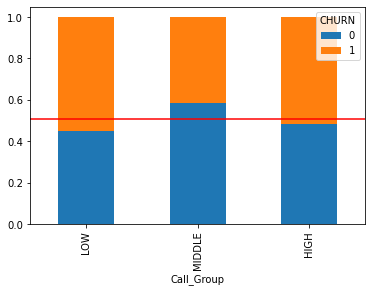

카이제곱통계량 232.43495129257877
p-value 3.3681515635006483e-51


In [91]:
temp = pd.crosstab(mobile['Call_Group'], mobile[target], normalize = 'index')
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(mobile[target], mobile['Call_Group'])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

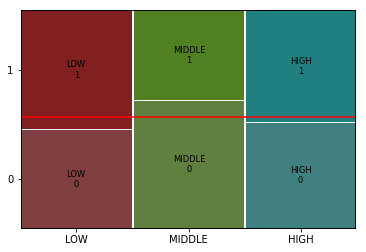

In [92]:
mosaic(mobile, [ 'Call_Group',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

### <파악한 내용>

* 숫자로 된것을 범주로 바꾸어 카이제곱 통계량을 살펴본 결과 자유도가 2인데 비해 232이라는 높은 수치를 나타내었고, pvalue도 0.05보다 현저히 작은 것을 보아 중간 관계라고 볼 수 있음
* 또한 평균통화시간이 많거나 적으면 이탈률이 높은것으로 보아 다른 통신사의 적절한 요금제를 찾으려 이탈하는 것으로 보임!!

### 4) 2개의 설문조사의 조합으로 이탈률 알아보기

In [101]:
mobile_question1 = mobile.groupby(['REPORTED_SATISFACTION'], as_index = False)[target].mean()
mobile_question1.sort_values(by = 'CHURN', ascending = False)

,REPORTED_SATISFACTION,CHURN
2,unsat,0.500836
4,very_unsat,0.499010
3,very_sat,0.488382
0,avg,0.472868
1,sat,0.472103


In [102]:
mobile_question2 = mobile.groupby(['CONSIDERING_CHANGE_OF_PLAN'], as_index = False)[target].mean()
mobile_question2.sort_values(by = 'CHURN', ascending = False)

,CONSIDERING_CHANGE_OF_PLAN,CHURN
4,perhaps,0.524008
3,no,0.499726
1,considering,0.489147
0,actively_looking_into_it,0.488435
2,never_thought,0.486696


In [103]:
mobile_question_total = mobile.groupby(['CONSIDERING_CHANGE_OF_PLAN','REPORTED_SATISFACTION'],
                                       as_index = False)[target].mean()
mobile_question_total.sort_values(by = 'CHURN', ascending = False)

,CONSIDERING_CHANGE_OF_PLAN,REPORTED_SATISFACTION,CHURN
21,perhaps,sat,0.596154
20,perhaps,avg,0.590361
22,perhaps,unsat,0.542857
24,perhaps,very_unsat,0.526961
17,no,unsat,0.523240
15,no,avg,0.517426
12,never_thought,unsat,0.508571
3,actively_looking_into_it,very_sat,0.507194
14,never_thought,very_unsat,0.505764
9,considering,very_unsat,0.502807


In [32]:
temp = mobile.loc[mobile['REPORTED_SATISFACTION'] == 'sat' ]
temp2 = temp.loc[temp['CONSIDERING_CHANGE_OF_PLAN'] == 'perhaps']
temp2.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
376,1,90767,238,7,172224.0,318,4,sat,perhaps,1
480,1,108224,0,46,498937.0,780,1,sat,perhaps,1
689,1,95371,0,78,309385.0,370,9,sat,perhaps,0
690,0,54195,62,0,265956.0,379,14,sat,perhaps,1
820,0,60000,0,73,740013.0,388,1,sat,perhaps,0


In [33]:
temp = mobile.loc[mobile['REPORTED_SATISFACTION'] == 'avg' ]
temp2 = temp.loc[temp['CONSIDERING_CHANGE_OF_PLAN'] == 'never_thought']
temp2.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
270,0,57924,0,0,767493.0,396,12,avg,never_thought,0
303,0,23392,202,6,223073.0,203,5,avg,never_thought,1
335,0,87933,0,6,887360.0,363,6,avg,never_thought,0
421,0,48023,0,0,235924.0,137,14,avg,never_thought,0
660,0,96398,54,7,960127.0,658,5,avg,never_thought,0


* 이탈률이 가장 높은 설문들과 가장 낮은 데이터를 추출함
* 이 또한 OVERAGE의 영향이 가장 컸으며 부가적으로 핸드폰 가격 및 집 가격이 영향을 미치는 것 같음.

### <파악한 내용>

* 위에서 관계를 살펴본 후 각 설문이 관계가 없다는 것이 이상하여 이들을 다시 한번 살펴보니 각 설문의 목적과는 다르게 이탈률이 나타나고 있음
* 두 설문 모두 관계가 없지만 만족도 조사보다는 변경 계획 설문이 조금 더 관계가 강한 것으로 판단됨
* 두 설문을 조합해본 결과 "perhaps"와 "sat"으로 설문을 작성한 사용자들이 제일 이탈률이 높음

### 5) INCOME과 HOUSE의 연관관계

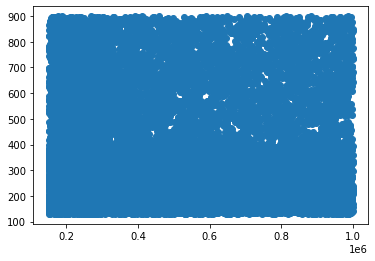

In [29]:
plt.scatter('HOUSE', 'HANDSET_PRICE', data = mobile)
plt.show()

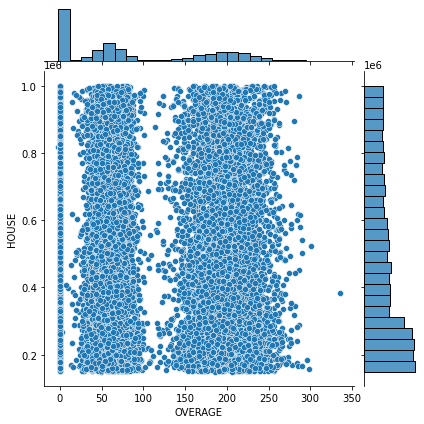

In [27]:
sns.jointplot(x='OVERAGE', y='HOUSE', data = mobile)
plt.show()

In [30]:
temp = mobile.loc[mobile['HANDSET_PRICE'].notnull() & mobile['HOUSE'].notnull()]
spst.pearsonr(temp['HOUSE'], temp['HANDSET_PRICE'])

(-0.0071220610381151255, 0.34224118078466004)